In [1]:

import tellurium as  tempfile, os, shutil
import tellurium as te, tellurium.temiriam as temiriam
te.setDefaultPlottingEngine('matplotlib')
import phrasedml


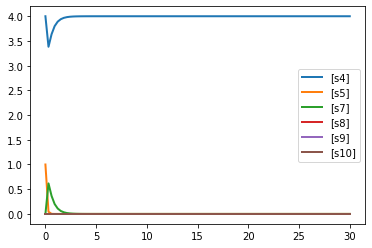

AttributeError: 'NoneType' object has no attribute 'AGraph'

In [3]:
r = te.loadSBMLModel("test.xml")
result = r.simulate(0, 30, 100)
r.plot(result)
r.draw()

print(r.getFullStoichiometryMatrix())

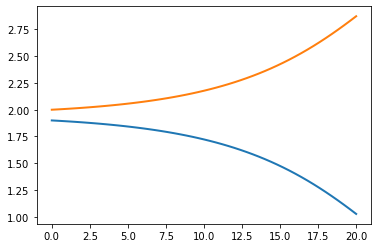

AttributeError: 'NoneType' object has no attribute 'AGraph'

In [4]:


r = te.loada('''
  model pathway()
    S1 -> S2; S1*S2^2*k1
    S2 -> S1; S2*S1^2*k1

    # Initialize values
    S1 = 1.9;
    S2 = 2;
    
    k1 = 0.02;
  end
''')

result = r.simulate(0, 20, 51)
te.plotArray(result);
r.draw()

In [ ]:

r = te.loada('''
  model pathway()
    S1 + S2 -> 2 S3; k1*S1*S2
    3 S3 -> 4 S4 + 6 S5; k2*S3^3
    k1 = 0.1;k2 = 0.1;
  end
''')
print(r.getCurrentAntimony())

In [ ]:
import tellurium as te
from roadrunner import Config

# We do not want CONSERVED MOIETIES set to true in this case
Config.setValue(Config.LOADSBMLOPTIONS_CONSERVED_MOIETIES, False)

# Generating different waveforms
model = '''
  model waveforms()
     # All waves have the following amplitude and period
     amplitude = 1
     period = 10

     # These events set the 'UpDown' variable to 1 or 0 according to the period.
     UpDown=0
     at sin(2*pi*time/period) >  0, t0=false: UpDown = 1
     at sin(2*pi*time/period) <= 0, t0=false: UpDown = 0

     # Simple Sine wave with y displaced by 3
     SineWave := amplitude/2*sin(2*pi*time/period) + 3

     # Square wave with y displaced by 1.5
     SquareWave := amplitude*UpDown + 1.5

     # Triangle waveform with given period and y displaced by 1
     TriangleWave = 1
     TriangleWave' = amplitude*2*(UpDown - 0.5)/period

     # Saw tooth wave form with given period
     SawTooth = amplitude/2
     SawTooth' = amplitude/period
     at UpDown==0: SawTooth = 0

     # Simple ramp
     Ramp := 0.03*time
  end
'''

r = te.loada(model)

r.timeCourseSelections = ['time', 'SineWave', 'SquareWave', 'SawTooth', 'TriangleWave', 'Ramp']
result = r.simulate (0, 90, 500)
r.plot(result)

# reset to default config
Config.setValue(Config.LOADSBMLOPTIONS_CONSERVED_MOIETIES, False)

In [ ]:
import tellurium as te
import numpy as np

r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
r.integrator = 'gillespie'
r.integrator.seed = 1234

results = []
for k in range(1, 50):
    r.reset()
    s = r.simulate(0, 40)
    results.append(s)
    r.plot(s, show=False, alpha=0.7)
te.show()

In [ ]:
results = []
for k in range(1, 20):
    r.reset()
    r.setSeed(123456)
    s = r.simulate(0, 40)
    results.append(s)
    r.plot(s, show=False, loc=None, color='black', alpha=0.7)
te.show()

In [ ]:
import tellurium as te

antimony_str = '''
// Created by libAntimony v2.9
model *case_09()

// Compartments and Species:
compartment compartment_;
species MKKK in compartment_, MKKK_P in compartment_, MKK in compartment_;
species MKK_P in compartment_, MKK_PP in compartment_, MAPK in compartment_;
species MAPK_P in compartment_, MAPK_PP in compartment_;

// Reactions:
J0: MKKK => MKKK_P; (J0_V1*MKKK)/((1 + (MAPK_PP/J0_Ki)^J0_n)*(J0_K1 + MKKK));
J1: MKKK_P => MKKK; (J1_V2*MKKK_P)/(J1_KK2 + MKKK_P);
J2: MKK => MKK_P; (J2_k3*MKKK_P*MKK)/(J2_KK3 + MKK);
J3: MKK_P => MKK_PP; (J3_k4*MKKK_P*MKK_P)/(J3_KK4 + MKK_P);
J4: MKK_PP => MKK_P; (J4_V5*MKK_PP)/(J4_KK5 + MKK_PP);
J5: MKK_P => MKK; (J5_V6*MKK_P)/(J5_KK6 + MKK_P);
J6: MAPK => MAPK_P; (J6_k7*MKK_PP*MAPK)/(J6_KK7 + MAPK);
J7: MAPK_P => MAPK_PP; (J7_k8*MKK_PP*MAPK_P)/(J7_KK8 + MAPK_P);
J8: MAPK_PP => MAPK_P; (J8_V9*MAPK_PP)/(J8_KK9 + MAPK_PP);
J9: MAPK_P => MAPK; (J9_V10*MAPK_P)/(J9_KK10 + MAPK_P);

// Species initializations:
MKKK = 90;
MKKK_P = 10;
MKK = 280;
MKK_P = 10;
MKK_PP = 10;
MAPK = 280;
MAPK_P = 10;
MAPK_PP = 10;

// Compartment initializations:
compartment_ = 1;

// Variable initializations:
J0_V1 = 2.5;
J0_Ki = 9;
J0_n = 1;
J0_K1 = 10;
J1_V2 = 0.25;
J1_KK2 = 8;
J2_k3 = 0.025;
J2_KK3 = 15;
J3_k4 = 0.025;
J3_KK4 = 15;
J4_V5 = 0.75;
J4_KK5 = 15;
J5_V6 = 0.75;
J5_KK6 = 15;
J6_k7 = 0.025;
J6_KK7 = 15;
J7_k8 = 0.025;
J7_KK8 = 15;
J8_V9 = 0.5;
J8_KK9 = 15;
J9_V10 = 0.5;
J9_KK10 = 15;

// Other declarations:
const compartment_, J0_V1, J0_Ki, J0_n, J0_K1, J1_V2, J1_KK2, J2_k3, J2_KK3;
const J3_k4, J3_KK4, J4_V5, J4_KK5, J5_V6, J5_KK6, J6_k7, J6_KK7, J7_k8;
const J7_KK8, J8_V9, J8_KK9, J9_V10, J9_KK10;
end
'''

phrasedml_str = '''
  mod1 = model "case_09"
  # sim1 = simulate uniform_stochastic(0, 4000, 1000)
  sim1 = simulate uniform(0, 4000, 1000)
  task1 = run sim1 on mod1
  repeat1 = repeat task1 for local.x in uniform(0, 10, 10), reset=true
  plot "MAPK oscillations" repeat1.MAPK vs repeat1.time vs repeat1.MAPK_P, repeat1.MAPK vs repeat1.time vs repeat1.MAPK_PP, repeat1.MAPK vs repeat1.time vs repeat1.MKK
  # report repeat1.MAPK vs repeat1.time vs repeat1.MAPK_P, repeat1.MAPK vs repeat1.time vs repeat1.MAPK_PP, repeat1.MAPK vs repeat1.time vs repeat1.MKK
'''

# create the inline OMEX string
inline_omex = '\n'.join([antimony_str, phrasedml_str])

# execute the inline OMEX
te.executeInlineOmex(inline_omex)

In [ ]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy
# Example showing use of events and how to set the y axis limits
r = te.loada ('''
  $Xo -> S;   Xo/(km + S^h);
  S -> $w;  k1*S;

     # initialize
     h = 1;   # Hill coefficient
     k1 = 1;  km = 0.1;
     S = 1.5; Xo = 2

     at (time > 10): Xo = 5;
     at (time > 20): Xo = 2;
''')
r.Xo=1

# Time course simulation
m1 = r.simulate (0, 15, 100, ['time', 'Xo', 'S']);
r.Xo=1
m2 = r.simulate (15, 40, 100, ['time', 'Xo', 'S']);
r.Xo=10
m3 = r.simulate (40, 60, 100, ['time', 'Xo', 'S']);

m = numpy.vstack([m1, m2, m3])
p = te.plot(m[:,0], m[:,1], name='trace1')


In [ ]:
import tellurium as te

# Example of using antimony to create a stoichiometry matrix
r = te.loada('''
 J1: -> S1; v1;
 J2: S1 -> S2; v2;
 J3: S2 -> ; v3;
 J4: S3 -> S1; v4;
 J5: S3 -> S2; v5;
 J6: -> S3; v6;

 v1=1; v2=1; v3=1; v4=1; v5=1; v6=1;
''')

print(r.getFullStoichiometryMatrix())

In [ ]:
r = te.loada('''
    $Xo -> S1; vo;
    S1 -> S2; k1*S1 - k2*S2;
    S2 -> $X1; k3*S2;

    vo = 1
    k1 = 2; k2 = 0; k3 = 3;
''')

# parameter scan
p = te.ParameterScan(r,
    # settings
    startTime = 0,
    endTime = 6,
    numberOfPoints = 50,
    startValue = 1,
    endValue = 5,
    colormap = "cool",
    independent = ["Time", "k1"],
    dependent = "S1",
    xlabel = "Time",
    ylabel = "x",
    title = "Model"
)
# plot
p.plotSurface()